In [38]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt 

## Loading and Exploring Data

In [39]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

In [41]:
Y_train.shape

(60000,)

In [42]:
X_test.shape

(10000, 28, 28)

In [43]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

##  Visualizing Training Images

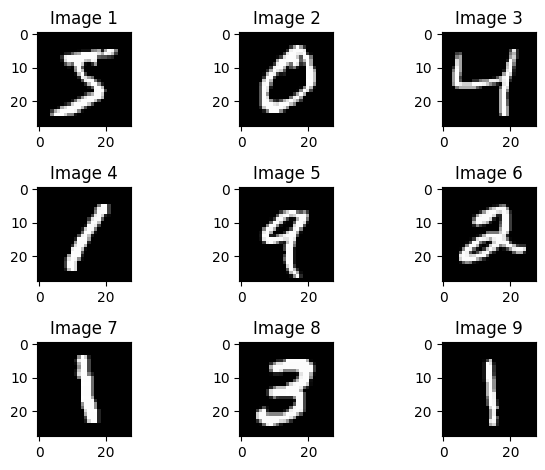

In [44]:
for i in range(9):
    plt.subplot(3,3, 1 + i)
    plt.imshow(X_train[i], cmap = plt.get_cmap("gray"))
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()

## Data Preprocessing

In [45]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

In [46]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

## Visualizing Preprocessed Images

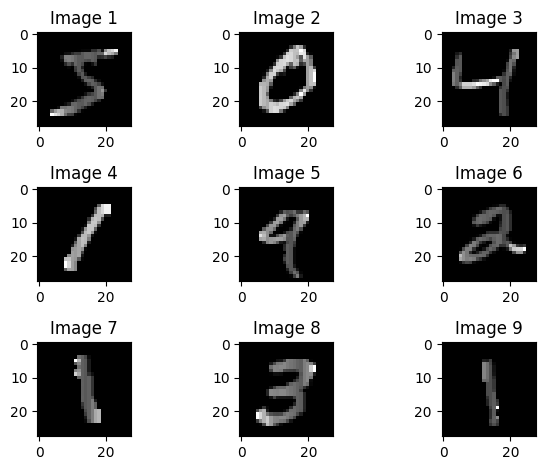

In [47]:
for i in range(9):
    plt.subplot(3,3, 1 + i)
    plt.imshow(np.squeeze(X_train_r[i]), cmap = plt.get_cmap("gray"))
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()

In [48]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


## Model Building

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))         
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())  
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))          
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))          

## Compiling and Train Model

In [50]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1842 - accuracy: 0.9441
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0705 - accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0524 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0421 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0360 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0311 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0271 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0244 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0213 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 43s 23m

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

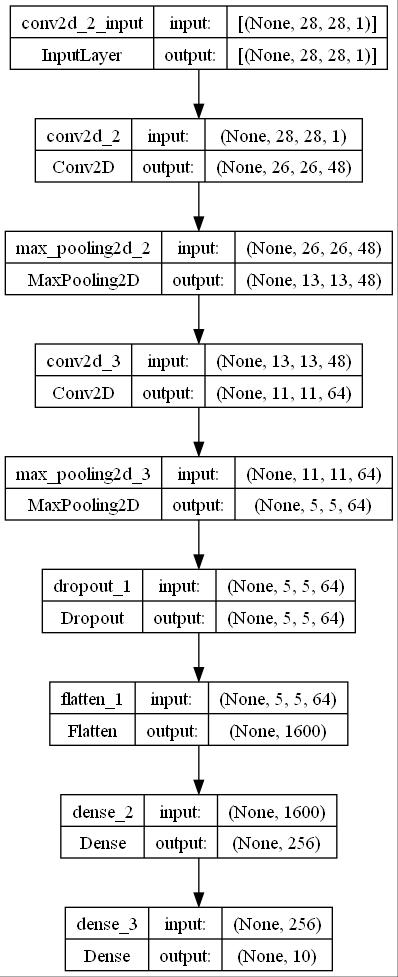

In [52]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'Handwritten_model.jpg', show_shapes = True)

## Model Evaluation

In [61]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Accuracy", val_accuracy*100, "%")

313/313 [==============================] - 2s 7ms/step - loss: 102.1805 - accuracy: 0.9307
Accuracy 93.07000041007996 %


## Saving and Loading Model

In [54]:
model.save('Users\HP\OneDrive\Desktop\LGM')

INFO:tensorflow:Assets written to: Users\HP\OneDrive\Desktop\LGM\assets


INFO:tensorflow:Assets written to: Users\HP\OneDrive\Desktop\LGM\assets


In [55]:
new_model = tf.keras.models.load_model('Users\HP\OneDrive\Desktop\LGM')

## Making Predictions with Loaded Model

In [56]:
predictions = new_model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


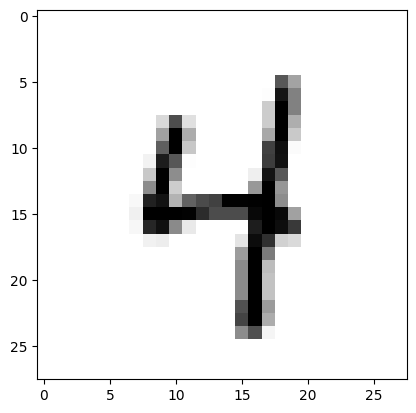

In [67]:
a = 19
plt.imshow(X_test[a], cmap = plt.get_cmap('binary'))

In [68]:
print("Probably the Prediction is: ", np.argmax(predictions[a]))

Probably the Prediction is:  4
